<a href="https://colab.research.google.com/github/naikprajwal246-cpu/TREE-SPECIESS/blob/main/TRESS_CNNm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/naikprajwal246-cpu/TREE-SPECIESS.git
%cd TREE-SPECIESS

Cloning into 'TREE-SPECIESS'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
/content/TREE-SPECIESS


In [5]:
import os
os.listdir('/content/drive/My Drive')

['archive (7).zip', 'Colab Notebooks']

In [6]:
import zipfile
zip_path = '/content/drive/My Drive/archive (7).zip'
extract_path = '/content/Tree_Species_Dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Unzipped successfully.")

Unzipped successfully.


In [7]:
import os
inner_path = '/content/Tree_Species_Dataset/Tree_Species_Dataset'
print("Tree species folders:", os.listdir(inner_path))

Tree species folders: ['gulmohor', 'cactus', 'kanchan', 'coconut', 'banyan', 'vad', 'gunda', 'motichanoti', '.git', 'garmalo', 'sitafal', 'sonmahor', 'simlo', 'nilgiri', 'neem', 'other', 'khajur', 'kesudo', 'sugarcane', 'shirish', 'pipal', 'mango', 'jamun', 'amla', 'babul', 'saptaparni', 'pilikaren', 'asopalav', 'bamboo', 'bili', 'champa']


In [8]:
class_dirs = os.listdir(inner_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [9]:
import glob
image_paths = []
labels = []

for class_name in os.listdir(inner_path):
    class_folder = os.path.join(inner_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1605


In [10]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(inner_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

          Image Count
other             150
cactus             50
gulmohor           50
coconut            50
banyan             50
shape:  (31, 1)


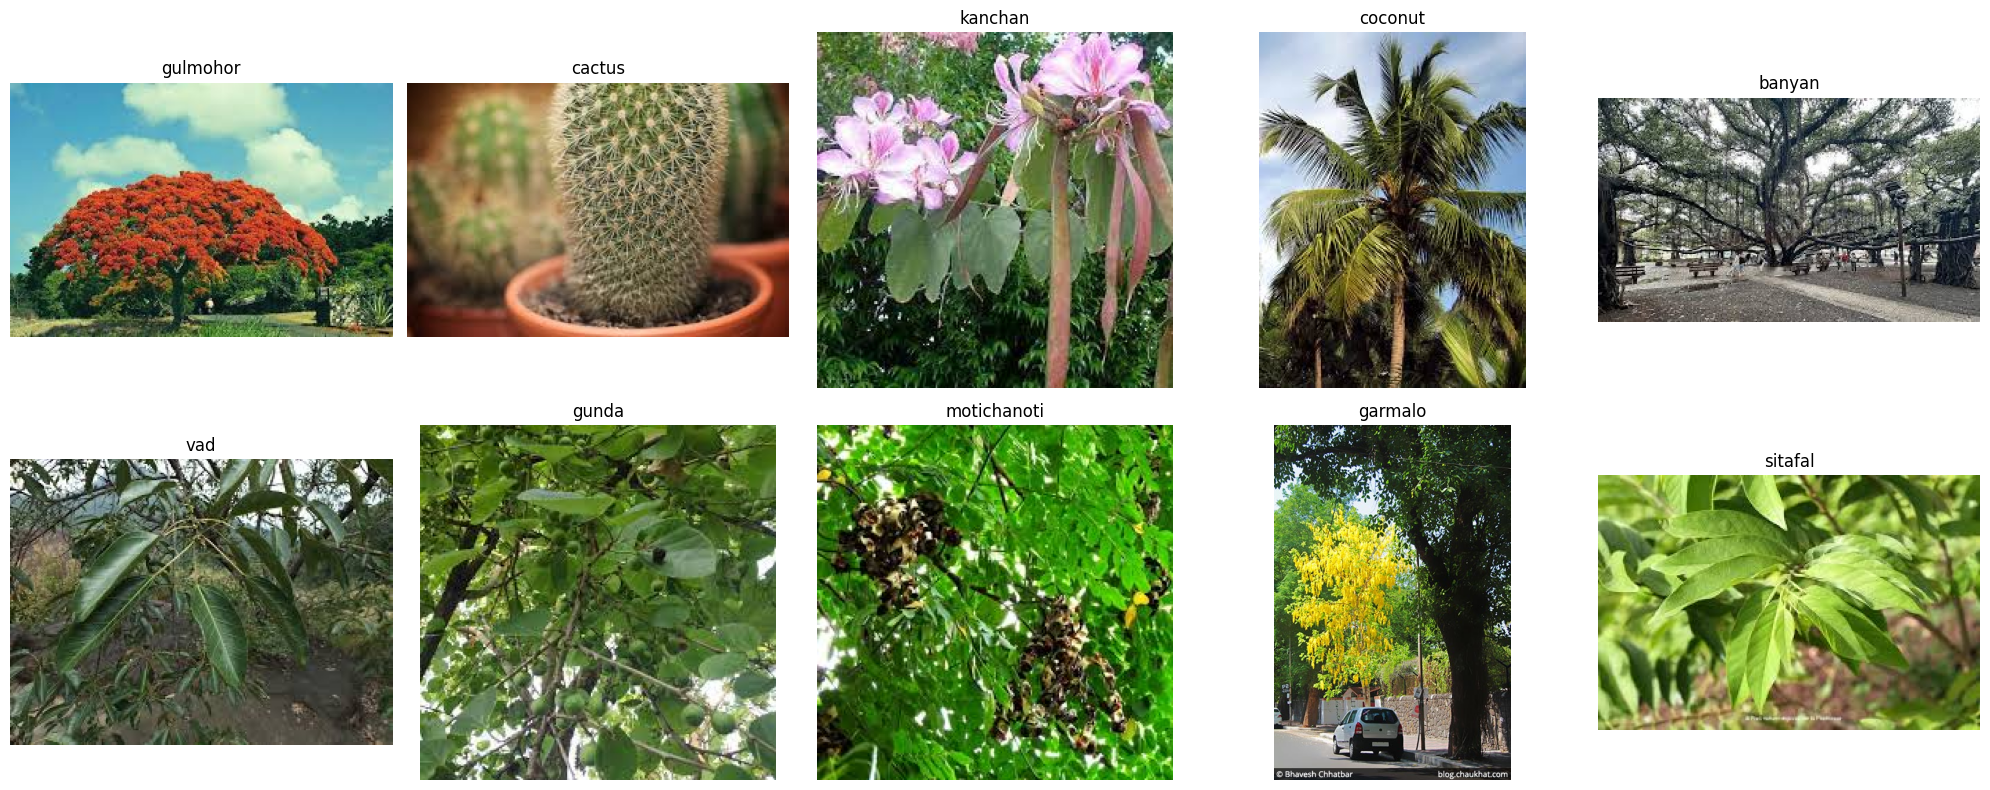

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

def show_sample_images(inner_path, class_dirs, n=10):  # Show total 10 images (5x2)
    rows, cols = 2, 5  # Adjust rows and columns
    plt.figure(figsize=(20, 8))
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

    shown = 0
    for class_dir in class_dirs:
        class_path = os.path.join(inner_path, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.splitext(f)[1].lower() in image_extensions]

        if not image_files:
            continue

        img_path = os.path.join(class_path, image_files[0])
        try:
            img = Image.open(img_path)
            plt.subplot(rows, cols, shown + 1)  # Use 2x5 grid
            plt.imshow(img)
            plt.title(class_dir)
            plt.axis('off')
            shown += 1
            if shown == n:
                break
        except UnidentifiedImageError:
            print(f"⚠️ Skipping unreadable image: {img_path}")
            continue

    plt.tight_layout()
    plt.show()


# Use the correct paths
show_sample_images(inner_path, class_dirs)


In [12]:
import os
from PIL import Image
import pandas as pd

repo_path = '/content/Tree_Species_Dataset/Tree_Species_Dataset'
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith('.')]

image_shapes = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            print(f"❌ Skipping: {img_path}")
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print("✅ Image shapes loaded successfully:")
print(shapes_df.head())

✅ Image shapes loaded successfully:
   Width  Height
0    275     183
1    271     186
2    275     183
3    306     165
4    225     225


In [13]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [14]:
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [15]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


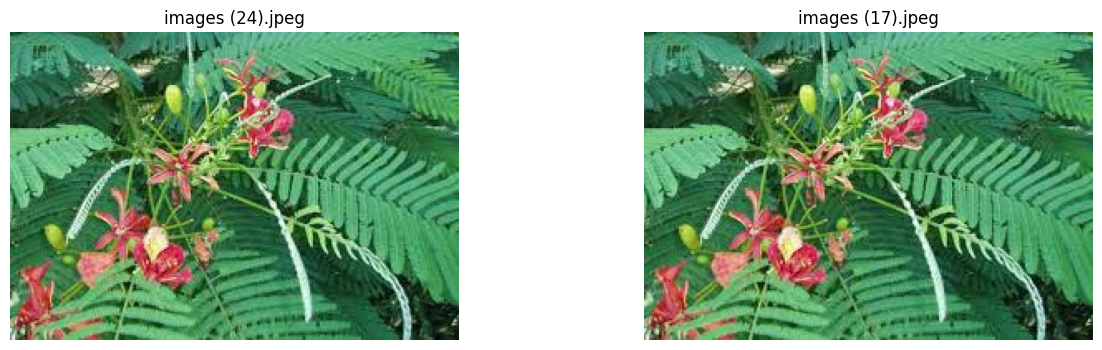

Duplicate set 2:


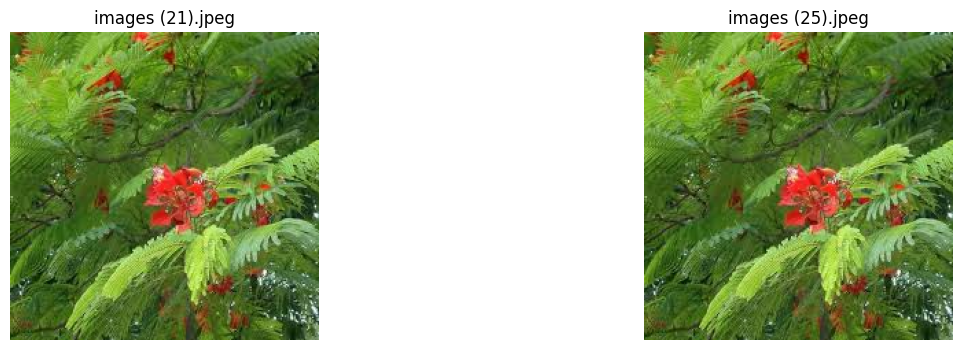

Duplicate set 3:


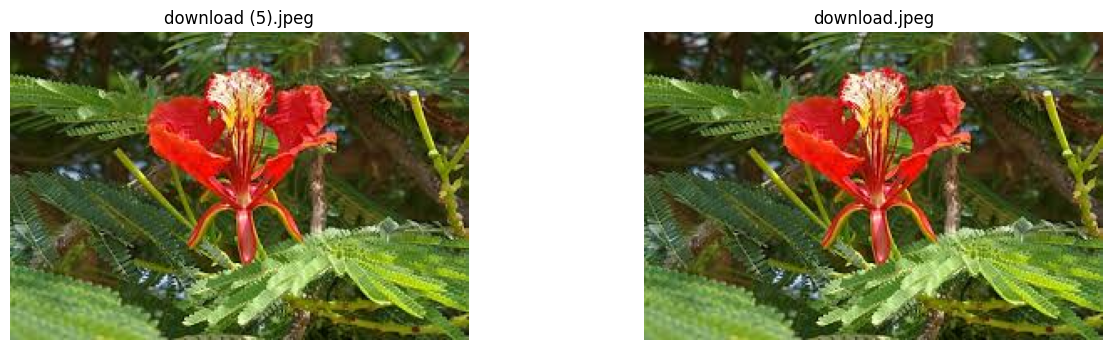

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1
show_duplicate_sets(duplicates, sets_to_display=3)


In [17]:
import os

removed_count = 0

for dup_list in duplicates.values():
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [18]:
hashes = defaultdict(list)
for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [19]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]
print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


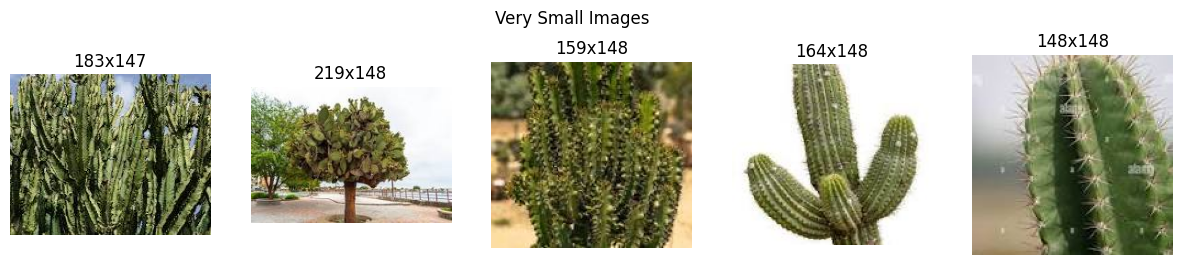

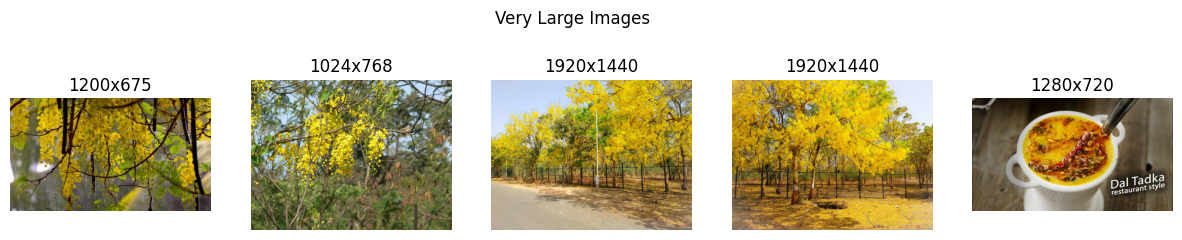

In [20]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [21]:
import os
outliers = pd.concat([small_imgs, large_imgs])
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [22]:
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# Advanced augmentation for better generalization
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # EfficientNet-specific preprocessing
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # Trees may appear in any orientation
    brightness_range=[0.7, 1.3],
    fill_mode='nearest',
    validation_split=0.2
)

# No augmentation for validation
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Flow from directory
train_gen = train_datagen.flow_from_directory(
    repo_path,
    target_size=(300, 300),  # Slightly larger for EfficientNet details
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    repo_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load EfficientNetB0 base model
base_model = EfficientNetB0(include_top=False,
                            input_shape=(300, 300, 3),
                            weights='imagenet')
base_model.trainable = False  # Freeze base initially

# Build the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')  # Auto-match number of classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 10, 10, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386,498 (16.73 MB)

 Trainable params: 336,415 (1.28 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Optional: Callbacks
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)
# Save the final model after training
model.save('tree_species_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1123 - loss: 3.7160 - precision: 0.3437 - recall: 0.0562

37/37 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1145 - loss: 3.7018 - precision: 0.3488 - recall: 0.0573 - val_accuracy: 0.3899 - val_loss: 2.4617 - val_precision: 1.0000 - val_recall: 0.0072
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.4115 - loss: 2.1545 - precision: 0.7146 - recall: 0.2281

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 835ms/step - accuracy: 0.4122 - loss: 2.1512 - precision: 0.7157 - recall: 0.2287 - val_accuracy: 0.5740 - val_loss: 1.9207 - val_precision: 1.0000 - val_recall: 0.0975
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.5176 - loss: 1.6585 - precision: 0.7961 - recall: 0.3508

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 828ms/step - accuracy: 0.5177 - loss: 1.6588 - precision: 0.7962 - recall: 0.3508 - val_accuracy: 0.6209 - val_loss: 1.5897 - val_precision: 0.9467 - val_recall: 0.2563
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.5885 - loss: 1.4628 - precision: 0.8399 - recall: 0.4076

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 841ms/step - accuracy: 0.5882 - loss: 1.4629 - precision: 0.8393 - recall: 0.4079 - val_accuracy: 0.6354 - val_loss: 1.3882 - val_precision: 0.8992 - val_recall: 0.3863
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.6017 - loss: 1.3244 - precision: 0.8594 - recall: 0.4219

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 820ms/step - accuracy: 0.6018 - loss: 1.3245 - precision: 0.8589 - recall: 0.4221 - val_accuracy: 0.6606 - val_loss: 1.2526 - val_precision: 0.8882 - val_recall: 0.4874
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 819ms/step - accuracy: 0.6556 - loss: 1.1645 - precision: 0.8450 - recall: 0.4970 - val_accuracy: 0.6570 - val_loss: 1.2000 - val_precision: 0.8457 - val_recall: 0.5343
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.6692 - loss: 1.1279 - precision: 0.8468 - recall: 0.5064

37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 832ms/step - accuracy: 0.6690 - loss: 1.1280 - precision: 0.8465 - recall: 0.5068 - val_accuracy: 0.6715 - val_loss: 1.1708 - val_precision: 0.8378 - val_recall: 0.5596
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.6630 - loss: 1.0664 - precision: 0.8611 - recall: 0.5441

37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 891ms/step - accuracy: 0.6628 - loss: 1.0673 - precision: 0.8606 - recall: 0.5440 - val_accuracy: 0.6895 - val_loss: 1.1424 - val_precision: 0.8394 - val_recall: 0.5848
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 806ms/step - accuracy: 0.6981 - loss: 0.9937 - precision: 0.8518 - recall: 0.5744 - val_accuracy: 0.6751 - val_loss: 1.1038 - val_precision: 0.8200 - val_recall: 0.5921
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.7149 - loss: 0.9416 - precision: 0.8688 - recall: 0.5990

37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 818ms/step - accuracy: 0.7146 - loss: 0.9429 - precision: 0.8684 - recall: 0.5985 - val_accuracy: 0.7040 - val_loss: 1.1005 - val_precision: 0.8267 - val_recall: 0.6029
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.7224 - loss: 0.9302 - precision: 0.8752 - recall: 0.6062

37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 943ms/step - accuracy: 0.7223 - loss: 0.9302 - precision: 0.8749 - recall: 0.6060 - val_accuracy: 0.7076 - val_loss: 1.0651 - val_precision: 0.8122 - val_recall: 0.6245
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 820ms/step - accuracy: 0.7122 - loss: 0.9434 - precision: 0.8477 - recall: 0.5897 - val_accuracy: 0.6787 - val_loss: 1.0607 - val_precision: 0.8169 - val_recall: 0.6282
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 817ms/step - accuracy: 0.7841 - loss: 0.7515 - precision: 0.9101 - recall: 0.6867 - val_accuracy: 0.6895 - val_loss: 1.1030 - val_precision: 0.8009 - val_recall: 0.6101
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 847ms/step - accuracy: 0.7423 - loss: 0.8185 - precision: 0.8758 - recall: 0.6368 - val_accuracy: 0.6823 - val_loss: 1.0967 - val_precision: 0.7832 - val_recall: 0.6390
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 774ms/step - accuracy: 0.7547 - loss: 0.8129 - precision: 0.8724 - recall: 0.6579

37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 818ms/step - accuracy: 0.7549 - loss: 0.8120 - precision: 0.8728 - recall: 0.6581 - val_accuracy: 0.7148 - val_loss: 0.9964 - val_precision: 0.7930 - val_recall: 0.6498
Epoch 16/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.7435 - loss: 0.8098 - precision: 0.8674 - recall: 0.6487

37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 884ms/step - accuracy: 0.7435 - loss: 0.8100 - precision: 0.8676 - recall: 0.6486 - val_accuracy: 0.7256 - val_loss: 0.9836 - val_precision: 0.7860 - val_recall: 0.6498
Epoch 17/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 863ms/step - accuracy: 0.7768 - loss: 0.7605 - precision: 0.8893 - recall: 0.6814 - val_accuracy: 0.7076 - val_loss: 1.0663 - val_precision: 0.7939 - val_recall: 0.6534
Epoch 18/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 796ms/step - accuracy: 0.7838 - loss: 0.6890 - precision: 0.9062 - recall: 0.7035 - val_accuracy: 0.7004 - val_loss: 1.1366 - val_precision: 0.7807 - val_recall: 0.6426
Epoch 19/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 805ms/step - accuracy: 0.7893 - loss: 0.7171 - precision: 0.9028 - recall: 0.7088 - val_accuracy: 0.7148 - val_loss: 1.0817 - val_precision: 0.7792 - val_recall: 0.6498


In [26]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.optimizers import Adam

# # 📁 Dataset Path
# dataset_path = '/content/Tree_Species_Dataset/Tree_Species_Dataset'

# # 🔄 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# # 📦 Train and Validation Generators
# train_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True,
#     seed=42
# )

# val_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation',
#     shuffle=False,
#     seed=42
# )

# # 🧠 CNN with Batch Normalization
# model = Sequential([
#     Input(shape=(224, 224, 3)),

#     Conv2D(32, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),

#     Flatten(),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),

#     Dense(128, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(train_generator.num_classes, activation='softmax')  # 31 classes
# ])

# # ⚙️ Compile
# model.compile(
#     optimizer=Adam(learning_rate=1e-4),
#     loss='categorical_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# )

# model.summary()

# # ⏱ Callbacks
# callbacks = [
#     ModelCheckpoint("best_batchnorm_cnn.h5", save_best_only=True, monitor='val_accuracy', mode='max'),
#     EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
# ]

# # 🚀 Train the model
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=30,
#     callbacks=callbacks
# )

# # 💾 Save Final Model
# model.save('final_batchnorm_cnn_model.h5')
# print("✅ Model trained and saved successfully!")


In [27]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.optimizers import RMSprop

# # 🌱 Data Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=25,
#     zoom_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2
# )

# # 📁 Load dataset
# train_gen = train_datagen.flow_from_directory(
#     '/content/Tree_Species_Dataset/Tree_Species_Dataset',
#     target_size=(150, 150),  # Reduced size to save memory
#     batch_size=32,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True,
#     seed=42
# )

# val_gen = train_datagen.flow_from_directory(
#     '/content/Tree_Species_Dataset/Tree_Species_Dataset',
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation',
#     shuffle=False,
#     seed=42
# )

# # 🧠 CNN with BatchNormalization (Efficient, No OOM)
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     Conv2D(256, (3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),

#     GlobalAveragePooling2D(),  # ✅ Replace Flatten to reduce memory
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),

#     Dense(train_gen.num_classes, activation='softmax')
# ])

# # ⚙️ Compile
# model.compile(
#     optimizer=RMSprop(learning_rate=0.0005),
#     loss='categorical_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# )

# model.summary()

# # 📌 Callbacks
# checkpoint = ModelCheckpoint("best_batchnorm_cnn_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
# early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# # 🚀 Train
# history = model.fit(
#     train_gen,
#     validation_data=val_gen,
#     epochs=30,
#     callbacks=[checkpoint, early_stop, reduce_lr]
# )

# # 💾 Save final model
# model.save('final_batchnorm_cnn_model.h5')
# print("✅ BatchNormalization CNN model saved successfully.")


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🔁 Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# 📁 Load Data (Assumes class subfolders inside this directory)
dataset_path = '/content/Tree_Species_Dataset/Tree_Species_Dataset'

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# 🧠 CNN Model with BatchNormalization
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(300, 300, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(train_gen.num_classes, activation='softmax')
])

# 🧪 Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

# 📉 Callbacks
checkpoint = ModelCheckpoint("best_cnn_model_batchnorm.keras", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

# 🚀 Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# 💾 Save Final Model
model.save("final_cnn_batchnorm.keras")
print("✅ CNN model with BatchNormalization saved successfully.")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300, 300, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 150, 150, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 37, 37, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 165888)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    84,935,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │        15,903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,507,935 (330.00 MB)

 Trainable params: 86,504,991 (329.99 MB)

 Non-trainable params: 2,944 (11.50 KB)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.1087 - loss: 4.3471 - precision: 0.1961 - recall: 0.0560 - val_accuracy: 0.0253 - val_loss: 8.0336 - val_precision: 0.0376 - val_recall: 0.0253 - learning_rate: 5.0000e-04
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.1723 - loss: 3.3424 - precision: 0.3346 - recall: 0.0782 - val_accuracy: 0.0325 - val_loss: 6.9003 - val_precision: 0.0376 - val_recall: 0.0289 - learning_rate: 5.0000e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2557 - loss: 2.9222 - precision: 0.4759 - recall: 0.1334 - val_accuracy: 0.0903 - val_loss: 6.7478 - val_precision: 0.0916 - val_recall: 0.0903 - learning_rate: 5.0000e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 788ms/step - accuracy: 0.1837 - loss: 3.6268 - precision: 0.3042 - recall: 0.0820 - val_accuracy: 0.0325 - val_loss: 7.9961 - val_precision: 0.0692 - val_recall: 0.0325 - learning_rate: 5.0000e-04
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 29s 778ms/step

3. CNN Model (No BatchNormalization)

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🔁 Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load Data
dataset_path = '/content/Tree_Species_Dataset/Tree_Species_Dataset'

train_gen = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

val_gen = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Plain CNN Model (No BatchNormalization)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(train_gen.num_classes, activation='softmax')
])

#  Compile
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

#  Callbacks
checkpoint = ModelCheckpoint("best_cnn_model_plain.keras", monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

#  Train Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

#  Save Final Model
model.save("final_cnn_plain.keras")
print("✅ Plain CNN model (no BatchNormalization) saved successfully.")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 300, 300, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 37, 37, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 18, 18, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 165888)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    84,935,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 31)             │        15,903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,502,047 (329.98 MB)

 Trainable params: 86,502,047 (329.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.0743 - loss: 3.6894 - precision_1: 0.0695 - recall_1: 0.0027 - val_accuracy: 0.0903 - val_loss: 3.4115 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.0853 - loss: 3.3712 - precision_1: 0.2800 - recall_1: 0.0041 - val_accuracy: 0.1083 - val_loss: 3.2150 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1094 - loss: 3.2280 - precision_1: 0.3706 - recall_1: 0.0103 - val_accuracy: 0.1444 - val_loss: 3.0484 - val_precision_1: 0.8000 - val_recall_1: 0.0144 - learning_rate: 5.0000e-04
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 977ms/step - accuracy: 0.1286 - loss: 3.0777 - precision_1: 0.5316 - recall_1: 0.0353 - val_accuracy: 0.1877 - val_loss: 2.8258 - val_precision_1: 0.6316 - val_recall_1: 0.0866 - learning_rate: 5.0000e-04
Epoch